# Project 3: Language detection

In this project, you will create a 2-layer neural network by hand to detect
what language a sentence is written in.  I have provided you a data set
containing sentences in English, Spanish, French, German, Italian, and Portuguese,
and your neural network will use the frequency of the letters in the sentence
to detect the language.  

To make life simple, your network will only process two languages at a time,
for example, English-vs-Spanish; we do this so we can create a network that
does binary classification rather than multi-category classification.

## Features

The features we will use in this project are the relative frequencies of the
26 letters of the English alphabet in each sentence.  Each of the six languages
in our data set uses letters differently; for instance, see here:

http://letterfrequency.org/letter-frequency-by-language/

For example, while both Spanish and English have "e" as their most common letter,
the relative popularities of other letters differ in small or large ways.  Take a
look at the letter "t": in English, it's the 2nd-most-common letter, but in Spanish,
it barely makes the top third.  "h" is another letter that is used more frequently in English
than in Spanish.  The letters "w" and "k" show the opposite pattern: these letters appear
very rarely in Spanish but are common in English.

**Caveat**: While all six languages use essentially the same letters, there are extra
letters (plus accents) that we will have to handle.  Though linguistically questionable,
we will use a Python library to convert any letter not in the English alphabet to the closest
English letter.  For instance, in Spanish, "á" will be converted to "a," "ñ" will be converted
to "n," etc.

## Data

The dataset contains a selection of 200 sentences in each of the six languages (1200 sentences in all).
Each sentence is between 20 and 200 characters long.  **There is much more data available, but running this
on individual laptops limits our ability to process more data.  Running your code on larger training sets
will get you bonus points.**

## Introduction

Let's examine our data set a little.

In [1]:
# Load libraries
from unidecode import unidecode

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Take a look at the data

all_data = pd.read_csv("six-languages.csv")
all_data

,lang,text
0,deu,Sie ging über die sieben Berge zu den sieben Z...
1,deu,"Es ist der gleiche Esel, aber ein anderer Sattel."
2,deu,Darf ich an deinem Rechner meine Netzpost nach...
3,deu,Wie viel macht sieben mal drei?
4,deu,Sie hat ihn schreien hören.
...,...,...
1195,spa,Me recuerdo lo que vi.
1196,spa,No hablo francés. Tampoco hablo inglés.
1197,spa,"Seguí así, que lograrás muchas cosas."
1198,spa,Es mejor estar con gente inteligente en el inf...


In [3]:
# Display a few sentences from each language (at random).
# The languages are denoted by three-letter abbreviations:

# deu = German
# eng = English
# fra = French
# ita = Italian
# por = Portuguese
# spa = Spanish

LANGUAGES = ['deu', 'eng', 'fra', 'ita', 'por', 'spa']

for lang in LANGUAGES:
    display(all_data[all_data['lang'] == lang].sample(5))

,lang,text
56,deu,Königin Elisabeth II hat während ihres Lebens ...
188,deu,Tom hat eine Menge Schriften von Maria.
39,deu,Sie sind schwer bewaffnet.
74,deu,"Er sieht so als, als wäre er krank gewesen."
70,deu,Schlagt euer Buch auf Seite 59 auf.


,lang,text
229,eng,Tom is better than me.
260,eng,Tom propped himself up on one elbow.
293,eng,Ziri treated Rima with respect.
203,eng,The clientele seemed satisfied.
337,eng,My sister has been sick.


,lang,text
556,fra,Ils sont déjà arrivés.
485,fra,Tu n'aurais pas dû venir si tôt.
436,fra,"À en juger d'après ce superbe bronzage, il sem..."
468,fra,N'avez-vous rien de mieux à faire ?
502,fra,J'ai l'intention d'entrer en contact.


,lang,text
752,ita,Che succhi di frutta avete?
623,ita,"Lei ha visto quel film, vero?"
761,ita,Io non sono creativo.
685,ita,È stato molto gentile da parte tua di prestarm...
656,ita,L'artista è eternamente un ragazzo.


,lang,text
975,por,Estou fazendo uma boneca para Anna.
811,por,Este campo é pobre em água.
860,por,Os irmãos estão andando na praia.
908,por,"Em um breve momento de genialidade, eu descobr..."
840,por,"Você me considera uma ameaça, não é mesmo?"


,lang,text
1144,spa,En ese momento me pareció una buena idea.
1093,spa,El calor se apaga automáticamente cuando la ha...
1171,spa,"Tú eres lista, pero yo también."
1163,spa,¿A qué hora llegó ella al Aeropuerto de Narita?
1063,spa,Tomás trabajaba con María.


## Data cleaning

Here, we will remove punctuation, spaces, convert everything to lowercase, and
convert all characters to the 26-letter English alphabet.

In [4]:
# Remove all punctuation from the sentences, and convert all characters
# to the 26-letter English alphabet.
# We do this by first removing all characters from each sentence that 

ALL_LETTERS = "abcdefghijklmnopqrstuvwxyz"

# Illustrate with some data.
# Print one example from each language before modifying.

pd.set_option('display.max_columns', None)
print("Before modifying:")
sample = pd.DataFrame()
for lang in LANGUAGES:
    sample = pd.concat([sample, all_data[all_data['lang'] == lang].sample(1, random_state=10)])
display(sample)
    
all_data_freq = all_data.copy()

# Remove punctuation & spaces, convert to lowercase, convert to 26-letter English alphabet.

all_data_freq['text_alpha'] = all_data_freq['text'].map(lambda str: unidecode("".join(c for c in str.lower() if c.isalpha())))
print("\nAfter converting:")
sample = pd.DataFrame()
for lang in LANGUAGES:
    sample = pd.concat([sample, all_data_freq[all_data_freq['lang'] == lang].sample(1, random_state=10)])
display(sample)
    
# Find letter frequencies.

for letter in ALL_LETTERS:
    all_data_freq['freq_' + letter] = all_data_freq['text_alpha'].map(lambda str: str.lower().count(letter)/len(str))
    
print("With frequencies:")
sample = pd.DataFrame()
for lang in LANGUAGES:
    sample = pd.concat([sample, all_data_freq[all_data_freq['lang'] == lang].sample(1, random_state=10)])
display(sample)

Before modifying:


,lang,text
59,deu,Der harte Winter hat seine Spuren hinterlassen.
259,eng,I like to go to the park and watch the childre...
459,fra,Tom a embrassé son chien.
659,ita,Gli uomini d'affari vanno spesso a questo rist...
859,por,Não gosto de misturar negócios com diversão.
1059,spa,Por favor hable más alto.



After converting:


,lang,text,text_alpha
59,deu,Der harte Winter hat seine Spuren hinterlassen.,derhartewinterhatseinespurenhinterlassen
259,eng,I like to go to the park and watch the childre...,iliketogototheparkandwatchthechildrenintheplay...
459,fra,Tom a embrassé son chien.,tomaembrassesonchien
659,ita,Gli uomini d'affari vanno spesso a questo rist...,gliuominidaffarivannospessoaquestoristorante
859,por,Não gosto de misturar negócios com diversão.,naogostodemisturarnegocioscomdiversao
1059,spa,Por favor hable más alto.,porfavorhablemasalto


With frequencies:


,lang,text,text_alpha,freq_a,freq_b,freq_c,freq_d,freq_e,freq_f,freq_g,freq_h,freq_i,freq_j,freq_k,freq_l,freq_m,freq_n,freq_o,freq_p,freq_q,freq_r,freq_s,freq_t,freq_u,freq_v,freq_w,freq_x,freq_y,freq_z
59,deu,Der harte Winter hat seine Spuren hinterlassen.,derhartewinterhatseinespurenhinterlassen,0.075000,0.00,0.000000,0.025000,0.200000,0.000000,0.000000,0.075000,0.075000,0.000000,0.000000,0.025000,0.000000,0.125000,0.000000,0.025000,0.000000,0.125000,0.100000,0.100000,0.025000,0.000000,0.025000,0.0,0.000000,0.0
259,eng,I like to go to the park and watch the childre...,iliketogototheparkandwatchthechildrenintheplay...,0.057143,0.00,0.028571,0.042857,0.128571,0.000000,0.042857,0.085714,0.071429,0.014286,0.028571,0.057143,0.014286,0.085714,0.071429,0.028571,0.000000,0.042857,0.028571,0.100000,0.014286,0.014286,0.014286,0.0,0.028571,0.0
459,fra,Tom a embrassé son chien.,tomaembrassesonchien,0.100000,0.05,0.050000,0.000000,0.150000,0.000000,0.000000,0.050000,0.050000,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.000000,0.000000,0.050000,0.150000,0.050000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
659,ita,Gli uomini d'affari vanno spesso a questo rist...,gliuominidaffarivannospessoaquestoristorante,0.113636,0.00,0.000000,0.022727,0.068182,0.045455,0.022727,0.000000,0.113636,0.000000,0.000000,0.022727,0.022727,0.090909,0.113636,0.022727,0.022727,0.068182,0.113636,0.068182,0.045455,0.022727,0.000000,0.0,0.000000,0.0
859,por,Não gosto de misturar negócios com diversão.,naogostodemisturarnegocioscomdiversao,0.081081,0.00,0.054054,0.054054,0.081081,0.000000,0.054054,0.000000,0.081081,0.000000,0.000000,0.000000,0.054054,0.054054,0.189189,0.000000,0.000000,0.081081,0.108108,0.054054,0.027027,0.027027,0.000000,0.0,0.000000,0.0
1059,spa,Por favor hable más alto.,porfavorhablemasalto,0.200000,0.05,0.000000,0.000000,0.050000,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,0.100000,0.050000,0.000000,0.150000,0.050000,0.000000,0.100000,0.050000,0.050000,0.000000,0.050000,0.000000,0.0,0.000000,0.0


## Part A: Single layer neural network

Here, you will write code to create a single layer neural network that can distinguish between two
languages of your choice (from the six options).

In [5]:
# Set up Part A.

# Choose your languages.  Edit the variables below to set one language
# to be the "positive class" (LANG1) and one to be the "negative class" (LANG0).
# Use the three-letter abbreviation: deu, eng, fra, ita, por, spa.

LANG1 = 'spa'  # positive category
LANG0 = 'eng'  # negative category

# SANITY CHECKS BELOW ARE GIVEN FOR SPANISH/ENGLISH, but after you make sure those
# two languages are working, you can play around with others.

In [6]:
# I have written some code to produce a data set from the one above with only
# our two chosen languages.  It also removes the full sentences (which we don't need),
# since we're only training on the "freq_" columns.

def make_dataset(complete_data, pos_cat, neg_cat):
    data = complete_data.copy()
    data = data.drop(columns=['text', 'text_alpha'])
    data = data[data['lang'].isin([pos_cat, neg_cat])]
    data['lang'] = (data['lang'] == pos_cat).astype(int)
    return data

data = make_dataset(all_data_freq, LANG1, LANG0)
display(data)

,lang,freq_a,freq_b,freq_c,freq_d,freq_e,freq_f,freq_g,freq_h,freq_i,freq_j,freq_k,freq_l,freq_m,freq_n,freq_o,freq_p,freq_q,freq_r,freq_s,freq_t,freq_u,freq_v,freq_w,freq_x,freq_y,freq_z
200,0,0.111111,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.055556,0.000000,0.000000,0.027778,0.000000,0.055556,0.083333,0.138889,0.000000,0.000000,0.083333,0.000000,0.083333,0.027778,0.000000,0.055556,0.0,0.111111,0.0
201,0,0.078947,0.026316,0.052632,0.026316,0.078947,0.052632,0.052632,0.026316,0.105263,0.000000,0.000000,0.105263,0.026316,0.052632,0.078947,0.000000,0.000000,0.000000,0.000000,0.184211,0.026316,0.000000,0.026316,0.0,0.000000,0.0
202,0,0.000000,0.000000,0.000000,0.083333,0.125000,0.000000,0.000000,0.125000,0.125000,0.000000,0.041667,0.083333,0.041667,0.041667,0.083333,0.041667,0.000000,0.000000,0.041667,0.083333,0.041667,0.041667,0.000000,0.0,0.000000,0.0
203,0,0.037037,0.000000,0.037037,0.074074,0.296296,0.037037,0.000000,0.037037,0.111111,0.000000,0.000000,0.074074,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,0.0,0.000000,0.0
204,0,0.060606,0.000000,0.000000,0.030303,0.151515,0.000000,0.000000,0.060606,0.060606,0.000000,0.030303,0.030303,0.060606,0.060606,0.090909,0.000000,0.000000,0.030303,0.060606,0.212121,0.030303,0.000000,0.000000,0.0,0.030303,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0.000000,0.000000,0.058824,0.058824,0.235294,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.058824,0.058824,0.000000,0.117647,0.000000,0.058824,0.117647,0.000000,0.000000,0.117647,0.058824,0.000000,0.0,0.000000,0.0
1196,1,0.125000,0.062500,0.062500,0.000000,0.062500,0.031250,0.031250,0.062500,0.031250,0.000000,0.000000,0.093750,0.031250,0.093750,0.156250,0.031250,0.000000,0.031250,0.062500,0.031250,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1197,1,0.166667,0.000000,0.066667,0.000000,0.066667,0.000000,0.066667,0.033333,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.066667,0.000000,0.033333,0.066667,0.200000,0.000000,0.100000,0.000000,0.000000,0.0,0.000000,0.0
1198,1,0.045455,0.000000,0.030303,0.000000,0.212121,0.015152,0.030303,0.000000,0.075758,0.015152,0.000000,0.045455,0.015152,0.151515,0.106061,0.015152,0.015152,0.060606,0.060606,0.090909,0.015152,0.000000,0.000000,0.0,0.000000,0.0


In [7]:
## Create testing and training sets.

# In the real world, we would shuffle the data to make a random training/testing split,
# but here, since we have 200 examples, we're going to use the first half of each
# language for training and the last half for testing.

# In our data set above, the first half of the examples are one class and the last half
# are the other class (although depending on the languages you chose, 0 might be first and 1
# second, or the other way around, though it doesn't matter).  

# So create a training set of rows 0-99 and 200-299,
# and a testing set of rows 100-199 and 300-399
# 

# Make training set:
X = data.copy().drop(columns=['lang'])  # get rid of the lang column
y = data.copy()['lang']  # keep only the lang column
                      
X_train = pd.concat([X.iloc[0:100], X.iloc[200:300]]).to_numpy()
X_test = pd.concat([X.iloc[100:200], X.iloc[300:400]]).to_numpy()
y_train = pd.concat([y.iloc[0:100], y.iloc[200:300]]).to_numpy()
y_test = pd.concat([y.iloc[100:200], y.iloc[300:400]]).to_numpy()

# Sanity checks.
print(X_train.shape)  # should be (200, 26)
print(X_test.shape) # should be (200, 26)
print(y_train.shape) # should be (200,)
print(y_test.shape) # should be (200,)
print(np.unique(y_train, return_counts=True)) # count the number of 0's and 1's, should be 100 of each
print(np.unique(y_test, return_counts=True)) # count the number of 0's and 1's, should be 100 of each

(200, 26)
(200, 26)
(200,)
(200,)
(array([0, 1]), array([100, 100], dtype=int64))
(array([0, 1]), array([100, 100], dtype=int64))


## Single Layer Neural Network Refresher

Recall that in a single layer network, we have the following variables.  Some variables have their superscripts
dropped because in a single layer network, there's only one copy of them.

- $x$: values of our features that are in the input to the network.  Here, this
  is a vector of 26 letter frequencies.  In the code, this is called `x`.
- $in^{[1]}$: A copy of $x$, but with a 1 appended at the front.  In code, this is called `in` or `in1`.
- $W$ or $W^{[1]}$: Weight matrix. Dimensions are 1 row by 27 columns, because we have 27 features and 1 output
  in our network.  In code, this is `W`.
- $z$ or $z^{[1]}$: Computed as the matrix product of $W$ and the inputs $in^{[1]}$.  Because $W$ is only one row, this is 
  essentially the dot product of $W$ (treated as a vector) and $in^{[1]}$.  In code, this is `z` or `z1`.
- $a$ or $a^{[1]}$: Computed by the sigmoid function (activation function) applied to $z^{[1]}$.
  In code, this is `a` or `a1`.
  
Recall that a neural network's output is the result of the last activation function, which here is $a$ or $a^{[1]}$.

The loss function for a neural network doing classification is the cross-entropy loss function, which is:

$L(\hat{y}, y) = \dfrac{\hat{y} - y}{\hat{y}  (1 - \hat{y})}$.

Because the predicted value of a neural net, $\hat{y}$ is the same as the output variable $a$ or $a^{[1]}$ here,
we will often see:

$L(a, y) = \dfrac{a - y}{a  (1 - a)}$.

The cost function for a neural net is just the average loss over an entire set of training examples:

$J(W) = \displaystyle \dfrac{1}{m}\sum_{i=1}^{m} L(\hat{y}^{(i)}, y^{(i)})$,

where $y^{(i)}$ is the $i$'th training example *correct* output (0 or 1) and $\hat{y}^{(i)} = a^{(i)}$ is the 
corresponding *predicted* output (a number between 0 and 1) for that same $i$'th training example.

The forward propagation code for this neural net is already written for you.  Note that it returns
three variables, `in`, `z1`, and `a1`.
  
You must write the following functions:

- `compute_cost`: Compute the cost (average loss) over the training set.
- `backward_prop`: Run backpropagation.

The values you are computing for backpropagation are the entries in the matrix $\dfrac{\partial L}{\partial w_j}$.
We are using the notation $w_j$ to stand for the $j$'th entry in the weight matrix $W$.  Because $W$ has only one row,
$w_j$ is stored in the variable `W[0][j]` and the corresponding partial derivative will be in `dL_dW[0][j]`.

Formula: $\dfrac{\partial L}{\partial w_j} = \dfrac{\partial L}{\partial a} \cdot \dfrac{\partial a}{\partial z}
  \cdot \dfrac{\partial z}{\partial w_j}$
  
where

$\dfrac{\partial L}{\partial a} = \dfrac{a-y}{a(1-a)}$

$\dfrac{\partial a}{\partial z} = \sigma(z)(1-\sigma(z))$

and

$\dfrac{\partial z}{\partial w_j} = in_j$

So you will return a single row, 27 column matrix with entries using the formula above (three multiplications).
You can do this with a for loop.
Note that the first two terms are the same for all entries in the matrix, and so don't need to be computed inside the loop.


In [17]:
# Single layer neural network

INPUT_SIZE = 27

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def compute_z(W, inputs):
    '''
    Compute the z vector for a neural network.
    inputs: inputs to the neural network, vector of variable size.
    W: weight matrix for the inputs, matrix of variable size.
    '''
    return W @ inputs

def compute_activation(z_vector):
    return sigmoid(z_vector)

def deriv_activation(z):
    return sigmoid(z) * (1 - sigmoid(z))

def deriv_cross_entropy_loss(a, y):
    return (a - y)/(a * (1 - a))

def compute_cross_entropy_loss(a, y):
    if y == 0:
        return -np.log(1-a)
    else:
        return -np.log(a)

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W, x):
    '''
    Run the forward propagation algorithm.
    x: input to the neural network, vector of size INPUT_SIZE - 1
    W: weight matrix, matrix of size (1, INPUT_SIZE)
    returns: 2 scalars, z1 and a1
    '''
    DEBUG = False
    
    # we assume x DOES NOT have a 1 in front.
    assert len(x) == INPUT_SIZE - 1
    
    # check dimensions of W
    assert W.shape == (1, INPUT_SIZE)
    
    # set inputs
    in1 = augment_vector(x)
    if DEBUG: print("Input to this layer is", in1)
    
    # make sure dimensions match inputs and W
    assert len(in1) == W.shape[1]

    # get W matrix
    if DEBUG: print("Using W of shape", W.shape)

    # compute z1
    z1 = compute_z(W, in1)
    if DEBUG: print("z is", z1)

    # compute a1
    a1 = compute_activation(z1)
    if DEBUG: print("a1 is", a1)
    
    return in1, z1, a1
    
def compute_output(x, W):
    '''
    Returns the output of the neural network (probability of x being in the 1 class).
    x: input to the neural network, vector of size INPUT_SIZE - 1
    W: weight matrix, matrix of size (1, INPUT_SIZE)
    '''
    
    # we assume x DOES NOT have a 1 in front.
    assert len(x) == INPUT_SIZE - 1
    
    # check dimensions of W
    assert W.shape == (1, INPUT_SIZE)
    
    in1, z1, a1 = forward_prop(W, x)
    return a1

def make_prediction(x, W):
    '''
    Returns the classification of x.
    x: input to the neural network, vector of size INPUT_SIZE - 1
    W: weight matrix, matrix of size (1, INPUT_SIZE)
    '''
    
    # we assume x DOES NOT have a 1 in front.
    assert len(x) == INPUT_SIZE - 1
    
    # check dimensions of W
    assert W.shape == (1, INPUT_SIZE)
    
    in1, z1, a1 = forward_prop(W, x)
    if a1 >= 0.5:
        return 1
    else:
        return 0

def compute_cost(X_data, y_data, W):
    '''
    Compute the cost (average loss) over the training examples in X_data, y_data.
    W: weight matrix, matrix of size (1, INPUT_SIZE)
    returns: a scalar with the cost
    '''
    
    # check dimensions of W
    assert W.shape == (1, INPUT_SIZE)
    
    m = X_data.shape[0]
    return sum([compute_cross_entropy_loss(compute_output(X_data[i], W), y_data[i]) for i in range(m)]) / m

def backward_prop(W, y, in1, z1, a1):
    '''
    Run backward propagation.
    W: weight matrix of size (1, INPUT_SIZE)
    y: scalar of correct target output, 0 or 1
    in1: inputs to the neural network, length INPUT_SIZE
    z1: z1 scalar from forward prop of NN
    a1: activation vector from forward prop of NN
    Returns: partial derivatives of loss function with
       respect to each entry in weight matrix W (same dimensions as W)
    '''
    
    # make sure dimensions match inputs and W
    assert len(in1) == W.shape[1]
    
    # make derivative matrix of same size as W, filled with zeros
    dL_dW = np.full_like(W, 0)
    
    # YOUR CODE HERE
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            dL_dW[i][j] = deriv_cross_entropy_loss(a1[i], y) * deriv_activation(z1) * in1[j]
    
    return dL_dW

In [18]:
# Sanity checks for forward_prop

W_sanity = np.ones((1, INPUT_SIZE))
in1, z1, a1 = forward_prop(W_sanity, X_train[0])
print(in1, "\n", z1, "\n", a1)

# output:
#[1.         0.11111111 0.         0.         0.08333333 0.08333333
# 0.         0.         0.05555556 0.         0.         0.02777778
# 0.         0.05555556 0.08333333 0.13888889 0.         0.
# 0.08333333 0.         0.08333333 0.02777778 0.         0.05555556
# 0.         0.11111111 0.        ] 
# [2.] 
# [0.88079708]

[1.         0.11111111 0.         0.         0.08333333 0.08333333
 0.         0.         0.05555556 0.         0.         0.02777778
 0.         0.05555556 0.08333333 0.13888889 0.         0.
 0.08333333 0.         0.08333333 0.02777778 0.         0.05555556
 0.         0.11111111 0.        ] 
 [2.] 
 [0.88079708]


In [13]:
# Sanity checks for compute_cost

compute_cost(X_train, y_train, W_sanity)  # should be array([1.12692801])

array([1.12692801])

In [19]:
# Sanity checks for backprop

print(backward_prop(W_sanity, y_train[0], in1, z1, a1))

#[[0.88079708 0.09786634 0.         0.         0.07339976 0.07339976
#  0.         0.         0.04893317 0.         0.         0.02446659
#  0.         0.04893317 0.07339976 0.12233293 0.         0.
#  0.07339976 0.         0.07339976 0.02446659 0.         0.04893317
#  0.         0.09786634 0.        ]]

[[0.88079708 0.09786634 0.         0.         0.07339976 0.07339976
  0.         0.         0.04893317 0.         0.         0.02446659
  0.         0.04893317 0.07339976 0.12233293 0.         0.
  0.07339976 0.         0.07339976 0.02446659 0.         0.04893317
  0.         0.09786634 0.        ]]


In [33]:
# Write code for gradient descent here.

# This is the same as every other gradient descent algorithm you've
# written.  Use a loop to run each iteration of gradient descent.
# Each iteration will make a pass over the training set X_train, y_train,
# running forward prop & backward prop to get the output of the network
# and the gradient matrix dL_dW.  We need to compute the AVERAGE of all
# these dL_dW matrices (we compute one for each training example), so you
# will need to add up the matrices as you calculate them into a "sum" or
# "total" matrix variable.  Then once the loop over the training set is done,
# you compute:
# W -= alpha * (1/m) * (sum of all the dL_dW matrices).

# Note that you can comment out the W = np.ones((1, INPUT_SIZE)) line 
# and the J_sequence = [] line
# if you run gradient descent but then want to run the cell again to 
# run additional training iterations.  Commenting out those initialization lines
# just lets you pick up where you left off when you ran the cell before.

W = np.ones((1, INPUT_SIZE))  
ALPHA = 20 # change this

J_sequence = []

for i in range(1000):
    W -= ALPHA * (1 / X_train.shape[0]) * sum([backward_prop(W, y_train[i], *forward_prop(W, X_train[i])) for i in range(X_train.shape[0])])
    J_sequence.append(compute_cost(X_train, y_train, W))
    
print("Final W:", W)

Final W: [[ -5.02347478  29.64641395  -0.56908367  16.24691417   1.45151702
   14.62875781  -3.5911138   -5.75869304 -25.58081249  -6.28873739
    1.08170268 -12.80143375   5.5865951   -6.75871979   3.16963092
   11.70538821   4.08028965  19.26492954   1.04764947   9.00421624
  -25.88882025  29.1215695    1.82916821 -30.30426785   1.73440939
  -14.19332804   2.11238345]]


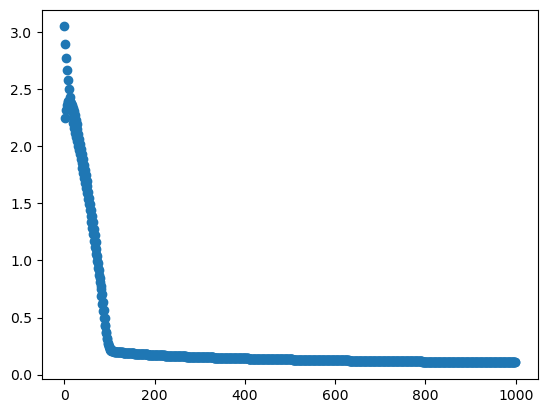

In [34]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

In [35]:
# Test/train accuracy

def compute_accuracy(X, y):
    # YOUR CODE HERE - compute accuracy for this data set of examples (X) and their
    # corresponding outputs (y).  X is a matrix and y is a vector, but X has the same
    # number of rows as y has entries.  Hint:
    m = X.shape[0]
    y_hat = np.array([make_prediction(X[i], W) for i in range(m)])
    return np.sum(y_hat == y) / m
    

# Try to get training accuracy and test accuracy to at least
# 95% and 90% respectively.  (for Spanish/English)

print(compute_accuracy(X_train, y_train))
print(compute_accuracy(X_test, y_test))

0.975
0.92


In [40]:
# Real life demo!

def classify_language(sentence):
    stripped_sentence = unidecode("".join(c for c in sentence.lower() if c.isalpha()))
    #print("Removed punctuation/accents/spaces:", stripped_sentence)
    d = {}
    for letter in ALL_LETTERS:
        d['freq_' + letter] = [stripped_sentence.lower().count(letter)/len(stripped_sentence)]
    x_demo = pd.DataFrame(d).to_numpy()[0]
    answer = make_prediction(x_demo, W)
    if answer == 1:
        return LANG1
    else:
        return LANG0
    
# Demo first five examples of each language:
for i in range(0, 5):
    sentence = all_data[all_data['lang'] == LANG0]['text'].iloc[i]
    print("\"" + sentence + "\" classified as " + classify_language(sentence))
    sentence = all_data[all_data['lang'] == LANG1]['text'].iloc[i]
    print("\"" + sentence + "\" classified as " + classify_language(sentence))
    
print()
sentence = input("Type in a sentence in " + LANG0 + " or " + LANG1)
print("You typed", sentence)

print("Predicted language:", classify_language(sentence))

"Do you know why Tom and Mary aren't here today?" classified as eng
"Los taxis en China son gratuitos, solo tienes que correr rápido." classified as spa
"Tom can be a little difficult to get along with." classified as eng
"Déjame dar una vuelta en tu Toyota nuevo." classified as spa
"I think I should've helped Tom." classified as eng
"La casa se encuentra en medio de árboles." classified as spa
"The clientele seemed satisfied." classified as eng
"Cuando como mucho por la noche tengo pesadillas." classified as spa
"It only takes me three minutes to do that." classified as eng
"No voy a dejar que hagas eso." classified as spa

You typed Cuando como mucho por la noche tengo pesadillas
Predicted language: spa


## Part B: 2 Layer Neural Network Refresher

Recall that in a 2 layer network (1 hidden layer), we have the following variables.  

- `HIDDEN_LAYER_SIZE`: number of nodes in the hidden layer.  This can be set to essentially any integer greater than zero.
  Larger numbers will generally increase performance, but will take longer to train.
- $x$: values of our features that are in the input to the network.  Here, this
  is a vector of 26 letter frequencies.  In the code, this is called `x`.
- $in^{[1]}$: A copy of $x$, but with a 1 appended at the front.  In code, this is called `in1`.
- $W^{[1]}$: Weight matrix. Dimensions are HIDDEN_LAYER_SIZE rows by 27 columns, because the first layer has 27 input 
  features and HIDDEN_LAYER_SIZE outputs.  In code, this is `W1`.
- $z^{[1]}$: Computed as the matrix product of $W1$ and the inputs $in^{[1]}$.  This will be a vector with the
  same number of entries as HIDDEN_LAYER_SIZE, because the first layer is now computing this many outputs (rather than
  just 1).  In code, this is `z1`.
- $a$ or $a^{[1]}$: Computed by the sigmoid function (activation function) applied to $z^{[1]}$.  Same size as $a^{[1]}$
  In code, this is `a` or `a1`.
- $in^{[2]}$: A copy of $a^{[1]}$, but with a 1 appended at the front.  In code, this is called `in2`.
- $W^{[2]}$: Weight matrix. Dimensions are 1 rows by HIDDEN_LAYER_SIZE+1 columns, because the second layer has 
  HIDDEN_LAYER_SIZE inputs (one each from layer 1, plus the bias input) and 1 output.  In code, this is `W2`.
- $z^{[2]}$: Computed as the matrix product of $W2$ and the inputs $in^{[2]}$.  Because $W2$ is only one row, this is 
  essentially the dot product of $W2$ (treated as a vector) and $in^{[2]}$.  In code, this is `z2`.
- $a^{[2]}$: Computed by the sigmoid function (activation function) applied to $z^{[2]}$.  Final output of the network.
  In code, this is `a2`.

Recall that a 2-layer neural network's output is the result of the last activation function, which here is $a^{[2]}$.
  
You must write the following functions:

- `forward_prop`: Run forward propagation.  You can use the single-layer NN code as a guide.  Returns six 
  variables: in1, a1, z1, in2, z2, a2.
- `make_prediction`: Use the single-layer code as a guide.
- `compute_cost`: Compute the cost (average loss) over the training set.
- `backward_prop`: Run backpropagation.

The values you are computing for backpropagation are the entries in the TWO matrices $\dfrac{\partial L}{\partial w^{[2]}_j}$
and $\dfrac{\partial L}{\partial w^{[1]}_{k,j}}$.

We are using the notation $w^{[2]}_j$ to stand for the $j$'th entry in the weight matrix $W^{[2]}$.  Because $W^{[2]}$ has only one row,
$w^{[2]}_j$ is stored in the variable `W2[0][j]` and the corresponding partial derivative will be in `dL_dW2[0][j]`.

We are using the notation $w^{[1]}_{k,j}$ to stand for the $k$'th row and $j$'th column in the weight matrix $W^{[1]}$.  
Unlike $W^{[2]}$, $W^{[1]}$ has multiple rows, so 
$w^{[1]}_{k,j}$ is stored in the variable `W1[k][j]` and the corresponding partial derivative will
be in `dL_dW1[k][j]`.

Formulas: 

Derivatives of output layer going backwards to hidden layer (do this first).  These entries will go in `dL_dW2`.

$\dfrac{\partial L}{\partial w^{[2]}_j} = \dfrac{\partial L}{\partial a^{[2]}} \cdot \dfrac{\partial a^{[2]}}{\partial z^{[2]}}
  \cdot \dfrac{\partial z^{[2]}}{\partial w^{[2]}_j}$
  
this is all basically the same as the single layer network, with one change:

$\dfrac{\partial z^{[2]}}{\partial w^{[2]}_j} = in^{[2]}_j$  (we just added the [2] subscript)

So you will return a single row, HIDDEN_LAYER_SIZE column matrix with entries using the formula above (three multiplications).
You can do this with a for loop where you loop over the `in2` variable.
Note that the first two terms are the same for all entries in the matrix, and so don't need to be computed inside the loop.

The derivatives for going from the hidden layer to the input layer are slightly more complicated.

$\dfrac{\partial L}{\partial w^{[1]}_{k,j}} = \dfrac{\partial L}{\partial a^{[2]}} \cdot \dfrac{\partial a^{[2]}}{\partial z^{[2]}}
  \cdot \dfrac{\partial z^{[2]}}{\partial a^{[1]}_k} \cdot \dfrac{\partial a^{[1]}_k}{\partial z^{[1]}_k}
  \cdot \dfrac{\partial z^{[1]}_k}{\partial w^{[1]}_{k,j}}$. 
  
The first two terms are the same as the first two terms above.

The third, fourth, and fifth terms are defined as:

$\dfrac{\partial z^{[2]}}{\partial a^{[1]}_k} = w^{[2]}_{k+1}$ = `W2[0][k+1]` (remember W2 is only one row) (the k+1 comes
from the fact that when we moved from $a^{[1]}$ to $in^{[2]}$, we added a bias input as $in^{[2]}_0$, so all the subscripts 
for $in^{[2]}$ are shifted up by 1.

$\dfrac{\partial a^{[1]}_k}{\partial z^{[1]}_k} = \sigma(z^{[1]}_k)(1-\sigma(z^{[1]}_k)$.

$\dfrac{\partial z^{[1]}_k}{\partial w^{[1]}_{k,j}} = in^{[1]}_j$

Computing this whole thing:

Use nested loops, one for $j$ and one for $k$.  Which one is inner and which one is outer doesn't matter too much.
The $k$ variable counts *rows* of `W1`/`dL_dW1` and $j$ counts the columns.  So you can calculate the upper bounds
of these nested loops in a few ways, based on the dimensions of `W1` or the lengths of `in1` and `in2`:

  In other words, remember the dimensions of `W1` (and therefore `dL_dW1`) are HIDDEN_LAYER_SIZE rows by 27 columns,
  So $k$ (row counter) should range from 0 to `HIDDEN_LAYER_SIZE` which should also be `len(in2)-1`.
  And $j$ (column counter) should range from 0 to `len(in1)` which should be 27.
  
Inside the nested loop, you should compute the last three terms of the five above.  You can re-use the first
two terms from the `dL_dW2` computation, assuming you saved them in variables.


In [18]:
# 2 layer neural network (one hidden layer)

INPUT_SIZE = 27
HIDDEN_LAYER_SIZE = 5

def sigmoid(z):
    return 1/(1 + np.exp(-z))

def compute_z(W, inputs):
    '''
    Compute the z vector for a neural network.
    inputs: inputs to the neural network, vector of variable size.
    W: weight matrix for the inputs, matrix of variable size.
    '''
    return W @ inputs

def compute_activation(z_vector):
    return sigmoid(z_vector)

def deriv_activation(z):
    return sigmoid(z) * (1 - sigmoid(z))

def deriv_cross_entropy_loss(a, y):
    return (a - y)/(a * (1 - a))

def compute_cross_entropy_loss(a, y):
    if y == 0:
        return -np.log(1-a)
    else:
        return -np.log(a)

def augment_vector(v):
    return np.insert(v, 0, 1)

def forward_prop(W1, W2, x):
    '''
    Run the forward propagation algorithm.
    x: input to the neural network, vector of size INPUT_SIZE - 1
    W1: weight matrix, matrix of size (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    W2: weight matrix, matrix of size (1, HIDDEN_LAYER_SIZE + 1)
    returns: in1, z1, a1, in2, z2, a2
    '''
    DEBUG = False
    
    # we assume x DOES NOT have a 1 in front.
    assert len(x) == INPUT_SIZE - 1
    
    # check dimensions of W1
    assert W1.shape == (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    
    # check dimensions of W2
    assert W2.shape == (1, HIDDEN_LAYER_SIZE + 1)
    
    # YOUR CODE HERE: use single layer NN code as a guide.
    
    # compute in1
    in1 = augment_vector(x)
    
    # compute z1
    z1 = compute_z(W1, in1)
    if DEBUG: print("z is", z1)

    # compute a1
    a1 = compute_activation(z1)
    if DEBUG: print("a1 is", a1)
    
    # compute in2
    in2 = augment_vector(a1)
    
    # compute z2
    z2 = compute_z(W2, in2)
    
    # compute a2
    a2 = compute_activation(z2)
    
    return in1, z1, a1, in2, z2, a2
    
def compute_output(x, W1, W2):
    '''
    Returns the output of the neural network (probability of x being in the 1 class).
    x: input to the neural network, vector of size INPUT_SIZE
    W1: weight matrix, matrix of size (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    W2: weight matrix, matrix of size (1, HIDDEN_LAYER_SIZE + 1)
    '''
    
    # we assume x DOES NOT have a 1 in front.
    assert len(x) == INPUT_SIZE - 1
    
    # check dimensions of W1
    assert W1.shape == (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    
    # check dimensions of W2
    assert W2.shape == (1, HIDDEN_LAYER_SIZE + 1)
    
    in1, z1, a1, in2, z2, a2 = forward_prop(W1, W2, x)
    return a2
    
def make_prediction(x, W1, W2):
    '''
    Returns the classification of x.
    x: input to the neural network, vector of size INPUT_SIZE
    W1: weight matrix, matrix of size (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    W2: weight matrix, matrix of size (1, HIDDEN_LAYER_SIZE + 1)
    '''
    
    # we assume x DOES NOT have a 1 in front.
    assert len(x) == INPUT_SIZE - 1
    
    # check dimensions of W1
    assert W1.shape == (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    
    # check dimensions of W2
    assert W2.shape == (1, HIDDEN_LAYER_SIZE + 1)
    
    # YOUR CODE HERE
    _, _, _, _, _, a2 = forward_prop(W1, W2, x)
    if a2 >= 0.5:
        return 1
    return 0

def compute_cost(X_data, y_data, W1, W2):
    '''
    Compute the cost (average loss) over the training examples in X_data, y_data.
    W1: weight matrix, matrix of size (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    W2: weight matrix, matrix of size (1, HIDDEN_LAYER_SIZE + 1)
    '''
    
    # check dimensions of W1
    assert W1.shape == (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    
    # check dimensions of W2
    assert W2.shape == (1, HIDDEN_LAYER_SIZE + 1)
    
    # YOUR CODE HERE
    m = X_data.shape[0]
    return np.sum([compute_cross_entropy_loss(compute_output(X_data[i], W1, W2), y_data[i]) for i in range(m)]) / m

def backward_prop(W1, W2, y, in1, z1, a1, in2, z2, a2):
    '''
    Run backward propagation.
    W1: weight matrix, matrix of size (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    W2: weight matrix, matrix of size (1, HIDDEN_LAYER_SIZE + 1)
    y: scalar of correct target output, 0 or 1
    in1: inputs to the neural network, length INPUT_SIZE
    z1: z1 scalar from forward prop of NN
    a1: activation vector from forward prop of NN
    in2: inputs to the 2nd layer of NN
    z2: z2 scalar from forward prop of NN
    a2: activation vector from forward prop of NN
    Returns: partial derivatives of loss function with
        respect to each entry in weight matrix W1 and W2 (same dimensions as W1 and W2)
    '''
    
    # check dimensions of W1
    assert W1.shape == (HIDDEN_LAYER_SIZE, INPUT_SIZE)
    
    # check dimensions of W2
    assert W2.shape == (1, HIDDEN_LAYER_SIZE + 1)
    
    # make derivative matrix of same size as W1, filled with zeros
    dL_dW1 = np.full_like(W1, 0)
    
    # make derivative matrix of same size as W2, filled with zeros
    dL_dW2 = np.full_like(W2, 0)
    
    # YOUR CODE HERE
    for i in range(W1.shape[0]):
        for j in range(W1.shape[1]):
            dL_dW1[i][j] = deriv_cross_entropy_loss(a2, y) * deriv_activation(z2) * W2[0][i+1] * deriv_activation(z1[i]) * in1[j]
    
    for i in range(W2.shape[0]):
        for j in range(W2.shape[1]):
            dL_dW2[i][j] = deriv_cross_entropy_loss(a2[i], y) * deriv_activation(z2) * in2[j]
    
    return dL_dW1, dL_dW2
     
    

In [9]:
# Sanity checks for forward_prop (for a hidden layer size of 5)

W1_sanity = np.ones((HIDDEN_LAYER_SIZE, INPUT_SIZE))
W2_sanity = np.ones((1, HIDDEN_LAYER_SIZE+1))
in1, z1, a1, in2, z2, a2 = forward_prop(W1_sanity, W2_sanity, X_train[0])
print(in1, "\n", z1, "\n", a1)
print(in2, "\n", z2, "\n", a2)

# output:
#[1.         0.11111111 0.         0.         0.08333333 0.08333333
# 0.         0.         0.05555556 0.         0.         0.02777778
# 0.         0.05555556 0.08333333 0.13888889 0.         0.
# 0.08333333 0.         0.08333333 0.02777778 0.         0.05555556
# 0.         0.11111111 0.        ] 
# [2. 2. 2. 2. 2.] 
# [0.88079708 0.88079708 0.88079708 0.88079708 0.88079708]
#[1.         0.88079708 0.88079708 0.88079708 0.88079708 0.88079708] 
# [5.40398539] 
# [0.99552153]

[1.         0.11111111 0.         0.         0.08333333 0.08333333
 0.         0.         0.05555556 0.         0.         0.02777778
 0.         0.05555556 0.08333333 0.13888889 0.         0.
 0.08333333 0.         0.08333333 0.02777778 0.         0.05555556
 0.         0.11111111 0.        ] 
 [2. 2. 2. 2. 2.] 
 [0.88079708 0.88079708 0.88079708 0.88079708 0.88079708]
[1.         0.88079708 0.88079708 0.88079708 0.88079708 0.88079708] 
 [5.40398539] 
 [0.99552153]


In [10]:
# Sanity checks for compute_cost (hidden layer size = 5)

compute_cost(X_train, y_train, W1_sanity, W2_sanity)  # should be array([2.70648122])

array([2.70648122])

In [11]:
# Sanity checks for backprop (hidden layer size = 5)

print(backward_prop(W1_sanity, W2_sanity, y_train[0], in1, z1, a1, in2, z2, a2))

#(array([[0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
#        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
#        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
#        0.01451714, 0.        , 0.        , 0.00871028, 0.        ,
#        0.00871028, 0.00290343, 0.        , 0.00580685, 0.        ,
#        0.01161371, 0.        ],
#       [0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
#        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
#        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
#        0.01451714, 0.        , 0.        , 0.00871028, 0.        ,
#        0.00871028, 0.00290343, 0.        , 0.00580685, 0.        ,
#        0.01161371, 0.        ],
#       [0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
#        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
#        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
#        0.01451714, 0.        , 0.        , 0.00871028, 0.        ,
#        0.00871028, 0.00290343, 0.        , 0.00580685, 0.        ,
#        0.01161371, 0.        ],
#       [0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
#        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
#        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
#        0.01451714, 0.        , 0.        , 0.00871028, 0.        ,
#        0.00871028, 0.00290343, 0.        , 0.00580685, 0.        ,
#        0.01161371, 0.        ],
#       [0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
#        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
#        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
#        0.01451714, 0.        , 0.        , 0.00871028, 0.        ,
#        0.00871028, 0.00290343, 0.        , 0.00580685, 0.        ,
#        0.01161371, 0.        ]]), array([[0.99552153, 0.87685246, 0.87685246, 0.87685246, 0.87685246,
#        0.87685246]]))

(array([[0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
        0.01451714, 0.        , 0.        , 0.00871028, 0.        ,
        0.00871028, 0.00290343, 0.        , 0.00580685, 0.        ,
        0.01161371, 0.        ],
       [0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
        0.01451714, 0.        , 0.        , 0.00871028, 0.        ,
        0.00871028, 0.00290343, 0.        , 0.00580685, 0.        ,
        0.01161371, 0.        ],
       [0.10452337, 0.01161371, 0.        , 0.        , 0.00871028,
        0.00871028, 0.        , 0.        , 0.00580685, 0.        ,
        0.        , 0.00290343, 0.        , 0.00580685, 0.00871028,
        0.01451714, 0.        , 0.        , 0.008

In [45]:
# Write code for gradient descent here.

# This is the same as earlier in this project, except you have
# two matrix variables, W1 and W2 now, and their corresponding
# gradients (derivative variables).

# Note that you can comment out the two W1/W2 initialization lines 
# and the J_sequence initialization line
# if you run gradient descent but then want to run the cell again to 
# run additional training iterations.  Commenting out the W initialization line
# just lets you pick up where you left off when you ran the cell before.

# THIS WILL TAKE A LONG TIME TO CONVERGE.  WHERE LONG TIME = POSSIBLY 5-10 MINUTES.
# I recommend finding a reasonable alpha by starting with a small number of iterations.
# Once you have a good alpha, then you can start running more and more iterations
# as to not have to sit around for minutes at a time waiting while this runs.
# You can also use the commenting-out-the-initialization idea above to see
# if you've converged, and if not, just pick up where you left off.

W1 = np.random.normal(size=(HIDDEN_LAYER_SIZE, INPUT_SIZE))
W2 = np.random.normal(size=(1, HIDDEN_LAYER_SIZE+1))
ALPHA = 5.0
J_sequence = []

for i in range(2000):
    dW = [backward_prop(W1, W2, y_train[i], *forward_prop(W1, W2, X_train[i])) for i in range(X_train.shape[0])]
    W1 -= ALPHA * (1 / X_train.shape[0]) * sum([dW[i][0] for i in range(X_train.shape[0])])
    W2 -= ALPHA * (1 / X_train.shape[0]) * sum([dW[i][1] for i in range(X_train.shape[0])])
    J_sequence.append(compute_cost(X_train, y_train, W1, W2))
    
print("Final W1 and W2:", W1, W2)

Final W1 and W2: [[-2.72890661e+00 -5.11965723e-01  2.57019680e-01  3.75150167e-02
  -1.79362411e-01  2.55102305e-01 -2.94514069e-01  1.22782347e+00
  -1.24607832e+00 -3.75035674e-01 -6.27936858e-01  1.08560666e+00
  -4.02897543e-01 -2.67596203e-01 -1.37610880e+00 -7.93039198e-02
   9.62207130e-01  6.53703218e-01 -8.40742267e-02 -7.45499929e-01
  -6.37352432e-01 -6.39379241e-01 -6.48599763e-01 -1.48355341e+00
  -6.50270804e-02 -1.85245046e-01 -2.48409586e+00]
 [ 1.32993153e+00 -8.68010660e+00 -6.27141690e-01 -6.27906295e+00
  -9.60683504e-01 -4.09407548e+00  4.74883585e-01  9.50300032e-01
   6.71270587e+00  3.45752938e+00  1.97849970e+00  5.57029621e+00
  -1.09960436e+00  1.21144452e+00 -2.53218940e-01 -6.65387704e+00
   7.81553213e-01 -9.97343949e+00  3.41690287e-01 -3.66468707e+00
   7.71847271e+00 -1.16971502e+01 -1.02078785e+00  1.34619188e+01
  -9.24918870e-01  3.16418868e+00  6.50700005e-01]
 [ 3.37433680e-01 -8.61262631e+00  5.04438361e-01 -3.66337733e+00
  -1.20379198e+00 -4.20

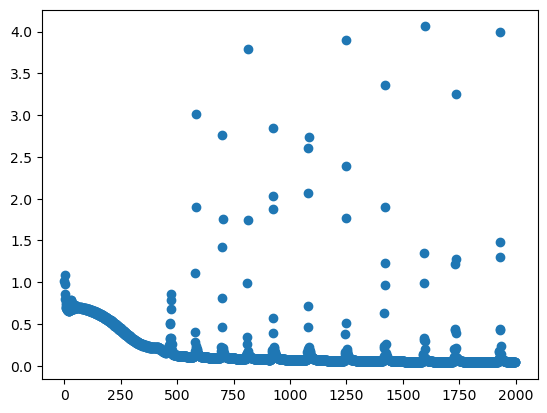

In [43]:
# Let's plot the cost as a function of number of iterations of the
# gradient descent algorithm.

plt.scatter(range(0, len(J_sequence)), J_sequence)
plt.show()

In [44]:
# Test/train accuracy

def compute_accuracy(X, y):
    m = X.shape[0]
    y_hat = np.array([make_prediction(X[i], W1, W2) for i in range(m)])
    return np.sum(y_hat == y) / m
    

# Try to get training accuracy and test accuracy to at least
# 99% and 91% respectively.  (for spanish/english)

print(compute_accuracy(X_train, y_train))
print(compute_accuracy(X_test, y_test))

0.99
0.92


In [46]:
# Real life demo!

def classify_language(sentence):
    stripped_sentence = unidecode("".join(c for c in sentence.lower() if c.isalpha()))
    #print("Removed punctuation/accents/spaces:", stripped_sentence)
    d = {}
    for letter in ALL_LETTERS:
        d['freq_' + letter] = [stripped_sentence.lower().count(letter)/len(stripped_sentence)]
    x_demo = pd.DataFrame(d).to_numpy()[0]
    answer = make_prediction(x_demo, W1, W2)
    if answer == 1:
        return LANG1
    else:
        return LANG0
    
# Demo first five examples of each language:
for i in range(0, 5):
    sentence = all_data[all_data['lang'] == LANG0]['text'].iloc[i]
    print("\"" + sentence + "\" classified as " + classify_language(sentence))
    sentence = all_data[all_data['lang'] == LANG1]['text'].iloc[i]
    print("\"" + sentence + "\" classified as " + classify_language(sentence))
    
print()
sentence = input("Type in a sentence in " + LANG0 + " or " + LANG1)
print("You typed", sentence)

print("Predicted language:", classify_language(sentence))

"Do you know why Tom and Mary aren't here today?" classified as eng
"Los taxis en China son gratuitos, solo tienes que correr rápido." classified as spa
"Tom can be a little difficult to get along with." classified as eng
"Déjame dar una vuelta en tu Toyota nuevo." classified as spa
"I think I should've helped Tom." classified as eng
"La casa se encuentra en medio de árboles." classified as spa
"The clientele seemed satisfied." classified as eng
"Cuando como mucho por la noche tengo pesadillas." classified as spa
"It only takes me three minutes to do that." classified as eng
"No voy a dejar que hagas eso." classified as spa

You typed Los taxis en China son gratuitos, solo tienes que correr rápido.
Predicted language: spa


In [47]:
# FINAL QUESTIONS
# answer this with respect to training on Spanish/English

# Train/Test accuracy for single-layer network:  (copy from above)
# ANSWER: 0.975/0.92

# Train/Test accuracy for two-layer network:  (copy from above)
# ANSWER: 0.99/0.92

# Extra credit for testing other languages.  For each other language pair
# you test, report training and testing accuracy.  (Up to 3 bonus points).
# ANSWERS: (tell me what language pairs you tried)

# For up to 2 more bonus points, speculate on why some language pairs are "harder"
# to learn than others.  Harder = lower testing/training accuracies meaning
# they are harder to distinguish from each other.  Refer to the specific
# language pairs you ran and the accuracies you came up with to support your
# arguments.  